# Dinosaur Fossil Recorde Insights

## 1.	Introduction
### Problem Statement
This project is based on a competition I participated in through DataCamp. The problem statement was as follows: Imagine you're applying for a summer internship at a national museum of natural history. The museum has recently created a database containing all dinosaur records from past field campaigns. Your task is to explore these fossil records to uncover interesting insights and advise the museum on the quality of the data.

In this project, I utilized Python libraries such as Pandas and Numpy to handle missing data, create visualizations, identify trends over time, and extract meaningful insights from the provided dataset. The analysis aimed to answer key questions posed by the competition, such as:
### Questions
1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Create an interactive map showing each record.
6. Any other insights you found during your analysis?

By addressing these questions, the project sought to enhance the museum's understanding of its fossil collection and provide recommendations for data quality improvement.


## 2. Data
The dataset containing dinosaur records was collected from the Paleobiology Database ([source](https://paleobiodb.org/#/)). The following table gives a brief description of the columns and key variables.


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

### 2.1. Initial Data Exploration

In [18]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np

SyntaxError: invalid syntax (3062515448.py, line 4)

In [21]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [22]:
import folium
from folium.plugins import MarkerCluster

In [8]:
# Load the data
dinosaurs = pd.read_csv('dinosaurs.csv')
# Preview the dataframe
dinosaurs

occurrence_no               name         diet              type  \
0            130294  Protarchaeopteryx   omnivorous    small theropod   
1            130295        Caudipteryx   omnivorous    small theropod   
2            139242        Gorgosaurus  carnivorous    large theropod   
3            139250        Gorgosaurus  carnivorous    large theropod   
4            139252        Gorgosaurus  carnivorous    large theropod   
...             ...                ...          ...               ...   
4946        1360627      Isaberrysaura          NaN               NaN   
4947        1363632        Stegosaurus  herbivorous  armored dinosaur   
4948        1363633     Othnielosaurus          NaN               NaN   
4949        1364695          Iguanodon  herbivorous        ornithopod   
4950        1365108         Luluichnus          NaN               NaN   

      length_m  max_ma  min_ma             region         lng        lat  \
0          2.0   130.0  122.46           Liaoning  120.733330  41.799999   
1          1.0   130.0  122.46           Liaoning  120.733330  41.799999   
2          8.6    83.5   70.60            Alberta -111.528732  50.740726   
3          8.6    83.5   70.60            Alberta -111.549347  50.737015   
4          8.6    83.5   70.60            Alberta -111.564636  50.723866   
...        ...     ...     ...                ...         ...        ...   
4946       NaN   171.6  168.40            Neuquén  -70.263290 -39.205288   
4947       9.0   157.3  152.10            Wyoming -107.816666  44.650002   
4948       NaN   157.3  152.10            Wyoming -107.816666  44.650002   
4949      10.0   145.0  139.80      Niedersachsen    9.959357  52.341167   
4950       NaN   139.8  125.00  Western Australia  122.142029 -17.489502   

             class             family  
0       Saurischia  Archaeopterygidae  
1       Saurischia    Caudipterygidae  
2       Saurischia    Tyrannosauridae  
3       Saurischia    Tyrannosauridae  
4       Saurischia    Tyrannosauridae  
...            ...                ...  
4946  Ornithischia                NaN  
4947  Ornithischia      Stegosauridae  
4948  Ornithischia                NaN  
4949  Ornithischia                NaN  
4950  Ornithischia                NaN  

[4951 rows x 12 columns]

Look into each column data type and overview of numerical columns:

In [9]:
print(dinosaurs.info())
dinosaurs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB
None


occurrence_no     length_m       max_ma       min_ma          lng  \
count   4.951000e+03  3568.000000  4951.000000  4951.000000  4951.000000   
mean    6.838323e+05     8.212688   117.518477   106.622270   -37.048675   
std     3.021524e+05     6.629887    45.270821    44.395885    84.591106   
min     1.302090e+05     0.450000    70.600000    66.000000  -153.247498   
25%     4.871225e+05     3.000000    83.500000    70.600000  -108.258705   
50%     5.618050e+05     6.700000    99.600000    89.800000   -96.099998   
75%     8.675665e+05    10.000000   155.700000   145.000000    27.383331   
max     1.365954e+06    35.000000   252.170000   247.200000   565.000000   

               lat  
count  4951.000000  
mean     34.591448  
std      23.961138  
min     -84.333336  
25%      36.274439  
50%      42.611198  
75%      47.745138  
max      78.101875

### 2.2 Missing Data
Find number of NULL values for each colums:

In [10]:
print(dinosaurs.isnull().sum())

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64


Check to ensure there are not duplicated records:

In [11]:
print(dinosaurs.duplicated().sum())

0


## 3. Methodology

## 4. Results
### 4.1. Dinosaurs Diversity within Our Dataset
Find number of different dinosaur names that are present in the data:


In [13]:
print(dinosaurs['name'].value_counts())

name
Richardoestesia      151
Saurornitholestes    136
Triceratops          125
Iguanodon            111
Troodon              111
                    ... 
Ziapelta               1
Plesiohadros           1
Sonorasaurus           1
Amygdalodon            1
Protarchaeopteryx      1
Name: count, Length: 1042, dtype: int64


**There are 1,042 unique dinosaur names that are present in the data**

### 4.2. Identify The Largest Dinosaurs
From the DESCRIBE function we know that the max length of a dinosaur in this record is 35.0 meters. Finding the largest dinosaur

In [14]:
largest_dinosaurs = dinosaurs[dinosaurs['length_m'] ==35.0]
print(largest_dinosaurs)

      occurrence_no             name         diet      type  length_m  max_ma  \
570          465134      Supersaurus  herbivorous  sauropod      35.0   155.7   
924          489575      Supersaurus  herbivorous  sauropod      35.0   155.7   
1165         513500  Argentinosaurus  herbivorous  sauropod      35.0    99.6   
1423         541209      Supersaurus  herbivorous  sauropod      35.0   157.3   
1972         693186      Supersaurus  herbivorous  sauropod      35.0   157.3   

      min_ma       region         lng        lat       class        family  
570    145.0     Colorado -108.397202  38.583099  Saurischia  Diplodocidae  
924    145.0  Estremadura   -9.343696  39.216393  Saurischia  Diplodocidae  
1165    89.8      Neuquén  -69.059998 -38.916672  Saurischia           NaN  
1423   145.0     Colorado -109.036133  39.200081  Saurischia  Diplodocidae  
1972   145.0      Wyoming -105.439041  42.629375  Saurischia  Diplodocidae  


**The Supersaurus and Argentinosaurus from Sauropod dinosaur type are the largest dinosaurs with 35 meters length.
There are 1383 rows missing length data value which is about 28% of all of records.**

### 4.3. Dinosaurs with Most Frequency

In [15]:
print(dinosaurs['type'].value_counts())

type
ornithopod          811
large theropod      733
small theropod      717
sauropod            665
ceratopsian         363
armored dinosaur    307
Name: count, dtype: int64


Bar plot per dinosaur type:

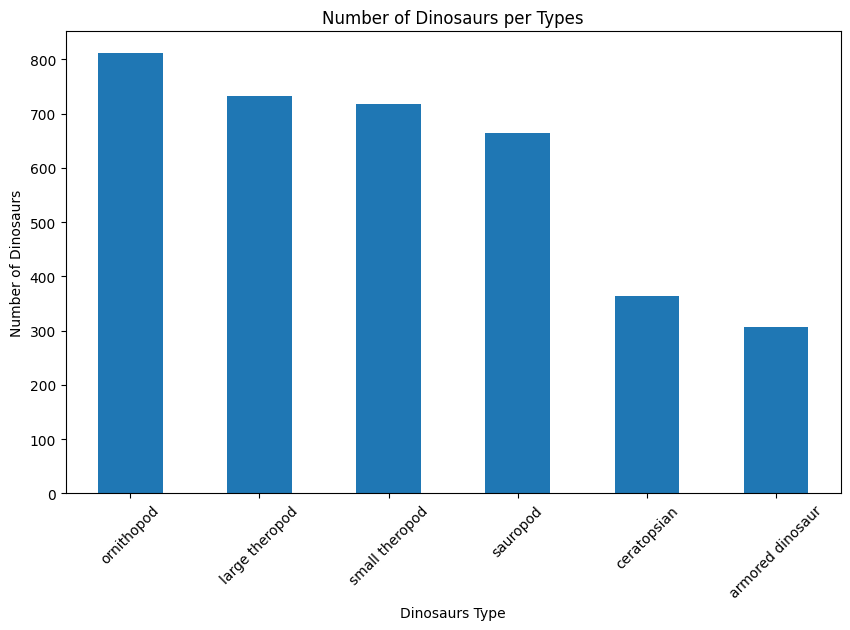

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in Column 'type'
type_counts = dinosaurs['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')

# Add titles and labels
plt.title('Number of Dinosaurs per Types')
plt.xlabel('Dinosaurs Type')
plt.ylabel('Number of Dinosaurs')
plt.xticks(rotation=45)
# Display the bar chart
plt.show()

**Based on the above plot Ornithopod type with 811 records has the most occurrences in this dataset**

### 4.4. Dinosaurs' Size Trend
The relationship between dinosaur's size and it's age

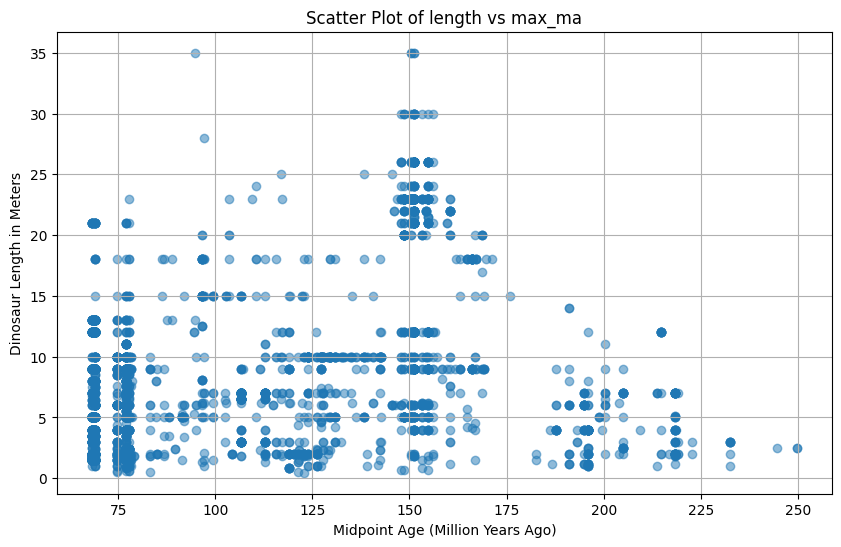

In [17]:
import matplotlib.pyplot as plt

dinosaurs ['mid_ma'] = (dinosaurs ['max_ma']+ dinosaurs ['min_ma'])/2
plt.figure(figsize=(10, 6))
plt.scatter(dinosaurs['mid_ma'], dinosaurs['length_m'], alpha=0.5)

# Add titles and labels
plt.title('Scatter Plot of length vs max_ma')
plt.xlabel('Midpoint Age (Million Years Ago)')
plt.ylabel('Dinosaur Length in Meters')
plt.grid(True)

# Display the scatter plot
plt.show()

**The data does not necessarily show a consistent grow of dinosaurs' length over time. Ther are fewer fossils that were found from dinosaurs of 200 to 300 million years age and although the records of those fossils all have lower than 15 meters length, this cannot demonstrate an increase in size of dinosaurs over time. Because there are numerous fossils found from dinosaurs of less than 75 million years age that are shorter than 5 meters.**

### 4.5. Interactive map showing each record


In [23]:
m = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=1)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in dinosaurs.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Record {row['occurrence_no']}\nName: {row['name']}\nRegion:{row['region']}", 
    ).add_to(marker_cluster)

# Display the map in a Jupyter notebook
m